# 数据挖掘作业 1 数据探索性分析与预处理

**姓名：刘张敏**

**学号：3220180832**

**日期：2019.3.29**

### 数据分析要求

**1. 数据可视化和摘要**

 数据摘要

- 对标称属性，给出每个可能取值的频数

- 对数值属性，给出最大、最小、均值、中位数、四分位数及缺失值的个数。

 数据的可视化

针对数值属性：

- 绘制直方图，用qq图检验其分布是否为正态分布。

- 绘制盒图，对离群值进行识别。


**2. 数据缺失的处理**

观察数据集中缺失数据，分析其缺失的原因。

分别使用下列四种策略对缺失值进行处理

- 将缺失部分剔除
- 用最高频率值来填补缺失值
- 通过属性的相关关系来填补缺失值
- 通过数据对象之间的相似性来填补缺失值

### 解答内容

In [4]:
#!/usr/bin/env python
# -*- coding:utf-8 -*-
import operator
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Step1. 读取数据**

- 读取csv文件，生成data frame

In [28]:
# 定义两类数据：标称型和数值型
name_category = ["Agency", "Location", "Area Id", "Beat", "Incident Type Id", "Event Number"]
name_value = ["Priority"]

# 读取数据
data_origin = pd.read_csv("./data_origin/records-for-2016.csv",
                   na_values = "XXXXXXX")

# 将字符数据转换为category
for item in name_category:
    data_origin[item] = data_origin[item].astype('category')

# 查看前10条数据内容
data_origin.iloc[:10]

,Agency,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
0,OP,2016-01-01T00:00:57.000,ST&MARKET ST,P1,05X,2.0,415GS,415 GUNSHOTS,LOP160101000003,2016-01-01T00:32:30.000
1,OP,2016-01-01T00:01:25.000,AV&HAMILTON ST,P3,26Y,2.0,415GS,415 GUNSHOTS,LOP160101000005,2016-01-01T00:48:23.000
2,OP,2016-01-01T00:01:43.000,ST&CHESTNUT ST,P1,02X,2.0,415GS,415 GUNSHOTS,LOP160101000008,2016-01-01T00:21:24.000
3,OP,2016-01-01T00:01:48.000,WALLACE ST,P2,18Y,2.0,415GS,415 GUNSHOTS,LOP160101000007,2016-01-01T01:15:03.000
4,OP,2016-01-01T00:02:05.000,90TH AV,P3,34X,2.0,415GS,415 GUNSHOTS,LOP160101000009,2016-01-01T00:54:52.000
5,OP,2016-01-01T00:02:55.000,PARK BLVD,P2,16Y,2.0,314,INDECENT EXPOSURE,LOP160101000010,2016-01-01T01:53:59.000
6,OP,2016-01-01T00:03:20.000,PIPPIN ST,P3,31Z,2.0,415GS,415 GUNSHOTS,LOP160101000011,2016-01-01T01:11:59.000
7,OP,2016-01-01T00:03:32.000,POTTER ST,P3,27X,2.0,415FC,415 FIRE CRACKERS,LOP160101000012,2016-01-01T01:43:12.000
8,OP,2016-01-01T00:04:35.000,OUTLOOK AV,P3,30Y,2.0,933R,ALARM-RINGER,LOP160101000014,2016-01-01T00:11:13.000
9,OP,2016-01-01T00:04:46.000,61ST ST,P1,10X,2.0,415FC,415 FIRE CRACKERS,LOP160101000017,2016-01-01T00:53:39.000


**Step 2. 数据摘要**

- 对标称属性，给出每个可能取值的频数

In [32]:
# 使用value_counts函数统计每个标称属性的取值频数
for item in name_category:
    print (item + "的频数为：\n") 
    print (pd.value_counts(data_origin[item].values))

Agency的频数为：

OP    110827
dtype: int64
Location的频数为：

 INTERNATIONAL BLVD                  2156
 AV&INTERNATIONAL BLVD               1829
 MACARTHUR BLVD                      1813
 BROADWAY                            1472
 7TH ST                              1223
 FOOTHILL BLVD                       1052
 TELEGRAPH AV                         875
 SAN PABLO AV                         765
 AV&MACARTHUR BLVD                    737
 FRUITVALE AV                         709
 BANCROFT AV                          707
 ST&BROADWAY                          691
 HIGH ST                              678
 ST&TELEGRAPH AV                      638
 73RD AV                              595
 HEGENBERGER RD                       591
 AV&FOOTHILL BLVD                     554
 LAKESHORE AV                         509
 WEBSTER ST                           465
 E 12TH ST                            455
 AV&BANCROFT AV                       440
 HARRISON ST                          436
 ST&MARKET ST         

- 对数值属性，给出最大、最小、均值、中位数、四分位数及缺失值的个数。

In [33]:
# 最大值
data_show = pd.DataFrame(data = data_origin[name_value].max(), columns = ['max'])
# 最小值
data_show['min'] = data_origin[name_value].min()
# 均值
data_show['mean'] = data_origin[name_value].mean()
# 中位数
data_show['median'] = data_origin[name_value].median()
# 四分位数
data_show['quartile'] = data_origin[name_value].describe().loc['25%']
# 缺失值个数
data_show['missing'] = data_origin[name_value].describe().loc['count'].apply(lambda x : 200-x)

In [34]:
data_show

,max,min,mean,median,quartile,missing
Priority,2.0,1.0,1.778438,2.0,2.0,-110627.0


**Step 3. 数据可视化 **

- 针对数值属性：
绘制直方图，用qq图检验其分布是否为正态分布。

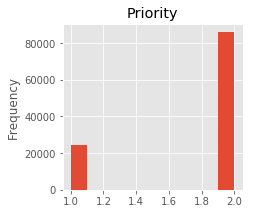

In [35]:
# 直方图
fig = plt.figure(figsize = (20,11))
i = 1
for item in name_value:
    ax = fig.add_subplot(3, 5, i)
    data_origin[item].plot(kind = 'hist', title = item, ax = ax)
    i += 1
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
fig.savefig('./image/histogram.jpg')

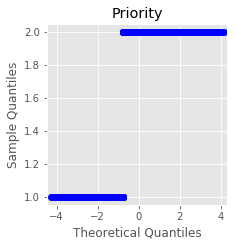

In [36]:
# qq图
fig = plt.figure(figsize = (20,12))
i = 1
for item in name_value:
    ax = fig.add_subplot(3, 5, i)
    sm.qqplot(data_origin[item], ax = ax)
    ax.set_title(item)
    i += 1
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
fig.savefig('./image/qqplot.jpg')

从qq图中可以看出，只有mxPH和mnO2两项值符合正态分布，其他值均不符合

- 绘制盒图，对离群值进行识别。

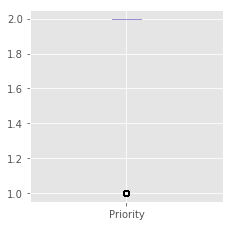

In [37]:
# 盒图
fig = plt.figure(figsize = (20,12))
i = 1
for item in name_value:
    ax = fig.add_subplot(3, 5, i)
    data_origin[item].plot(kind = 'box')
    i += 1
fig.savefig('./image/boxplot.jpg')

**Step 4. 数据缺失的处理**

可视化方法：对于**标称属性**，绘制属性的折线图，图中红线是原始数据，蓝线是处理完缺失值之后的数据；**数值属性**：使用直方图，将原始数据和处理后的数据图像进行叠加。图中红色的垂线是原始数据的均值，蓝色的垂线是处理完缺失值之后的均值。

4.0 观察数据

从绘制的表格上可以看出，缺失值主要集中在Beat个属性，第238条数据缺失情况比较严重

In [38]:
# 找出含有缺失值的数据条目索引值
nan_list = pd.isnull(data_origin).any(1).nonzero()[0]

# 显示含有缺失值的原始数据条目
data_origin.iloc[nan_list].style.highlight_null(null_color='red')

,Agency,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
238,OP,2016-01-01T11:04:27.000,76TH AVE,P3,nan,2,415,DISTURBING THE PEACE,LOP160101000462,2016-01-01T11:06:56.000
239,OP,2016-01-01T11:07:35.000,76TH AVE,P3,nan,2,415,DISTURBING THE PEACE,LOP160101000463,2016-01-01T11:08:20.000
404,OP,2016-01-01T18:29:28.000,,P1,nan,1,415C,415 UNKNOWN,LOP160101000791,2016-01-01T18:29:46.000
544,OP,2016-01-02T01:20:05.000,ST&SAN LEANDRO,P3,nan,1,901A,VEHICLE COLLISION-PE,LOP160102000053,2016-01-02T01:20:05.000
718,OP,2016-01-02T13:23:23.000,ST&ADELINE ST,P1,nan,2,23152,DUI ALCOHOL/DRUGS,LOP160102000390,2016-01-02T13:23:23.000
729,OP,2016-01-02T13:52:55.000,73RD AVE,P3,nan,2,273_6,VIOLATION OF COURT O,LOP160102000406,2016-01-02T13:53:46.000
1087,OP,2016-01-03T10:30:33.000,73RD AVE,P3,nan,2,273_6,VIOLATION OF COURT O,LOP160103000291,2016-01-03T10:31:33.000
1542,OP,2016-01-04T10:43:13.000,52ND AVE,PCW,nan,2,10851,STOLEN VEHICLE,LOP160104000372,2016-01-04T10:43:20.000
1619,OP,2016-01-04T13:30:20.000,AVE & SAN LEANDRO AVE,P3,nan,2,20002,HIT & RUN (PROPERTY,LOP160104000556,2016-01-04T13:32:01.000
1651,OP,2016-01-04T14:39:14.000,CAMPBELL STREET,P1,nan,2,SECCK,SECURITY CHECK,LOP160104000625,2016-01-04T15:00:04.000


4.1 将缺失部分剔除

使用***dropna()***函数操作。从结果可以看出，由于删除了带有缺失值的整条数据。

从标称属性的折线图，可以明显看出处理后的数据量减少；直方图中，蓝色线和红色线不重合，但是十分接近，说明数值属性的均值有改变，但是变化不大。

C:\Users\Adminstrator\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


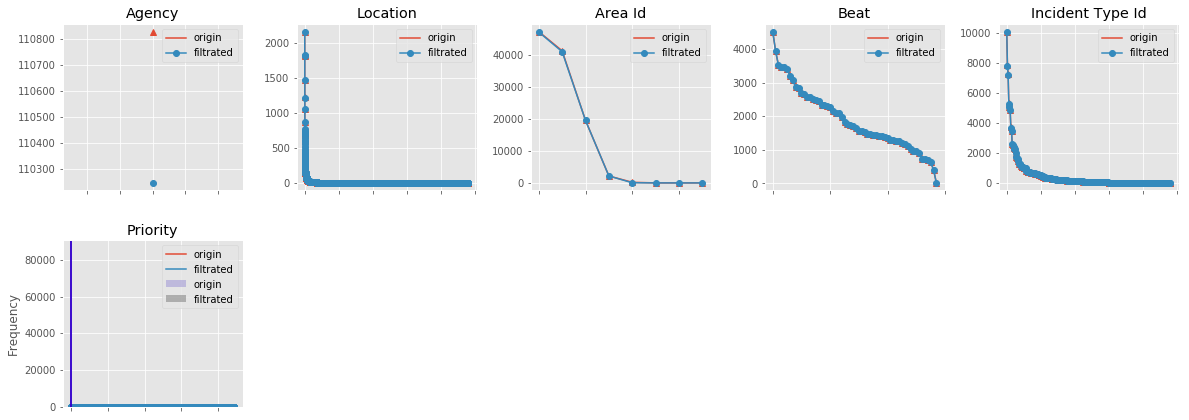

In [39]:
# 将缺失值对应的数据整条剔除，生成新数据集
data_filtrated = data_origin.dropna()

# 绘制可视化图
fig = plt.figure(figsize = (20,15))

i = 1
# 对标称属性，绘制折线图
for item in name_category:
    ax = fig.add_subplot(4, 5, i)
    ax.set_title(item)
    pd.value_counts(data_origin[item].values).plot(ax = ax, marker = '^', label = 'origin', legend = True)
    pd.value_counts(data_filtrated[item].values).plot(ax = ax, marker = 'o', label = 'filtrated', legend = True)
    i += 1

i = 6
# 对数值属性，绘制直方图
for item in name_value:
    ax = fig.add_subplot(4, 5, i)
    ax.set_title(item)
    data_origin[item].plot(ax = ax, alpha = 0.5, kind = 'hist', label = 'origin', legend = True)
    data_filtrated[item].plot(ax = ax, alpha = 0.5, kind = 'hist', label = 'filtrated', legend = True)
    ax.axvline(data_origin[item].mean(), color = 'r')
    ax.axvline(data_filtrated[item].mean(), color = 'b')
    i += 1
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

# 保存图像和处理后数据
fig.savefig('./image/missing_data_delete.jpg')
data_filtrated.to_csv('./data_output/missing_data_delete.csv', mode = 'w', encoding='utf-8', index = False,header = False)

4.2 用最高频率值来填补缺失值

使用***value_counts()***函数统计原始数据中，出现频率最高的值，再用***fillna()***函数将缺失值替换为最高频率值。

从折线图看出，处理后标称属性值不变；从直方图可以看出，数值属性的缺失值补全为高频值，均值基本保持不变。

C:\Users\Adminstrator\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


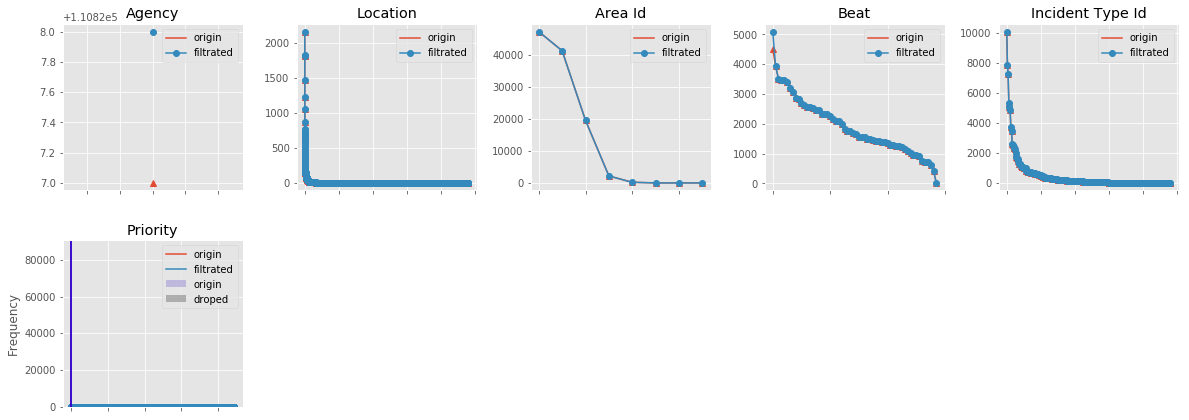

In [40]:
# 建立原始数据的拷贝
data_filtrated = data_origin.copy()
# 对每一列数据，分别进行处理
for item in name_category+name_value:
    # 计算最高频率的值
    most_frequent_value = data_filtrated[item].value_counts().idxmax()
    # 替换缺失值
    data_filtrated[item].fillna(value = most_frequent_value, inplace = True)

# 绘制可视化图
fig = plt.figure(figsize = (20,15))

i = 1
# 对标称属性，绘制折线图
for item in name_category:
    ax = fig.add_subplot(4, 5, i)
    ax.set_title(item)
    pd.value_counts(data_origin[item].values).plot(ax = ax, marker = '^', label = 'origin', legend = True)
    pd.value_counts(data_filtrated[item].values).plot(ax = ax, marker = 'o', label = 'filtrated', legend = True)
    i += 1    

i = 6
# 对数值属性，绘制直方图
for item in name_value:
    ax = fig.add_subplot(4, 5, i)
    ax.set_title(item)
    data_origin[item].plot(ax = ax, alpha = 0.5, kind = 'hist', label = 'origin', legend = True)
    data_filtrated[item].plot(ax = ax, alpha = 0.5, kind = 'hist', label = 'droped', legend = True)
    ax.axvline(data_origin[item].mean(), color = 'r')
    ax.axvline(data_filtrated[item].mean(), color = 'b')
    i += 1
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

# 保存图像和处理后数据
fig.savefig('./image/missing_data_most.jpg')
data_filtrated.to_csv('./data_output/missing_data_most.csv', mode = 'w', encoding='utf-8', index = False,header = False)

4.3 通过属性的相关关系来填补缺失值

使用pandas中Series的***interpolate()***函数，对数值属性进行插值计算，并替换缺失值。

从直方图中可以看出，处理后的数据，添加了若干个值不同的值，并且均值变化不大。

C:\Users\Adminstrator\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


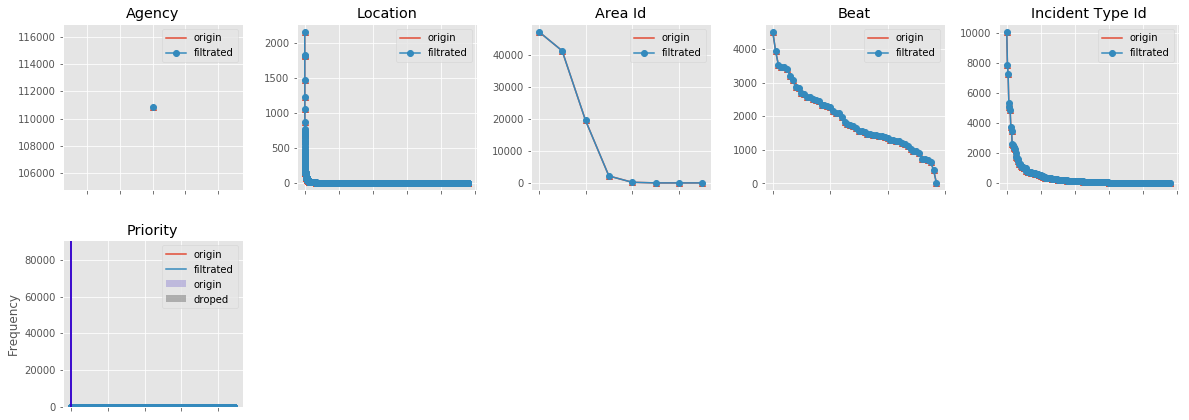

In [41]:
# 建立原始数据的拷贝
data_filtrated = data_origin.copy()
# 对数值型属性的每一列，进行插值运算
for item in name_value:
    data_filtrated[item].interpolate(inplace = True)

# 绘制可视化图
fig = plt.figure(figsize = (20,15))

i = 1
# 对标称属性，绘制折线图
for item in name_category:
    ax = fig.add_subplot(4, 5, i)
    ax.set_title(item)
    pd.value_counts(data_origin[item].values).plot(ax = ax, marker = '^', label = 'origin', legend = True)
    pd.value_counts(data_filtrated[item].values).plot(ax = ax, marker = 'o', label = 'filtrated', legend = True)
    i += 1   
    
i = 6
# 对数值属性，绘制直方图
for item in name_value:
    ax = fig.add_subplot(4, 5, i)
    ax.set_title(item)
    data_origin[item].plot(ax = ax, alpha = 0.5, kind = 'hist', label = 'origin', legend = True)
    data_filtrated[item].plot(ax = ax, alpha = 0.5, kind = 'hist', label = 'droped', legend = True)
    ax.axvline(data_origin[item].mean(), color = 'r')
    ax.axvline(data_filtrated[item].mean(), color = 'b')
    i += 1
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

# 保存图像和处理后数据
fig.savefig('./image/missing_data_corelation.jpg')
data_filtrated.to_csv('./data_output/missing_data_corelation.csv', mode = 'w', encoding='utf-8', index = False,header = False)

4.4 通过数据对象之间的相似性来填补缺失值

首先将缺失值设为0，对数据集进行正则化。然后对每两条数据进行差异性计算（分值越高差异性越大）。计算标准为：标称数据不相同记为1分，数值数据差异性分数为数据之间的差值。在处理缺失值时，找到和该条数据对象差异性最小（分数最低）的对象，将最相似的数据条目中对应属性的值替换缺失值。


In [43]:
# 建立原始数据的拷贝，用于正则化处理
data_norm = data_origin.copy()
# 将数值属性的缺失值替换为0
data_norm[name_value] = data_norm[name_value].fillna(0)
# 对数据进行正则化
data_norm[name_value] = data_norm[name_value].apply(lambda x : (x - np.mean(x)) / (np.max(x) - np.min(x)))

# 构造分数表
score = {}
range_length = len(data_origin)
for i in range(0, range_length):
    score[i] = {}
    for j in range(0, range_length):
        score[i][j] = 0    

# 在处理后的数据中，对每两条数据条目计算差异性得分，分值越高差异性越大
for i in range(0, range_length):
    for j in range(i, range_length):
        for item in name_category:
            if data_norm.iloc[i][item] != data_norm.iloc[j][item]:
                score[i][j] += 1
        for item in name_value:
            temp = abs(data_norm.iloc[i][item] - data_norm.iloc[j][item])
            score[i][j] += temp
        score[j][i] = score[i][j]

# 建立原始数据的拷贝
data_filtrated = data_origin.copy()

# 对有缺失值的条目，用和它相似度最高（得分最低）的数据条目中对应属性的值替换
for index in nan_list:
    best_friend = sorted(score[index].items(), key=operator.itemgetter(1), reverse = False)[1][0]
    for item in name_value:
        if pd.isnull(data_filtrated.iloc[index][item]):
            if pd.isnull(data_origin.iloc[best_friend][item]):
                data_filtrated.ix[index, item] = data_origin[item].value_counts().idxmax()
            else:
                data_filtrated.ix[index, item] = data_origin.iloc[best_friend][item]

# 绘制可视化图
fig = plt.figure(figsize = (20,15))

i = 1
# 对标称属性，绘制折线图
for item in name_category:
    ax = fig.add_subplot(4, 5, i)
    ax.set_title(item)
    pd.value_counts(data_origin[item].values).plot(ax = ax, marker = '^', label = 'origin', legend = True)
    pd.value_counts(data_filtrated[item].values).plot(ax = ax, marker = 'o', label = 'filtrated', legend = True)
    i += 1   
    
i = 6
# 对数值属性，绘制直方图
for item in name_value:
    ax = fig.add_subplot(4, 5, i)
    ax.set_title(item)
    data_origin[item].plot(ax = ax, alpha = 0.5, kind = 'hist', label = 'origin', legend = True)
    data_filtrated[item].plot(ax = ax, alpha = 0.5, kind = 'hist', label = 'droped', legend = True)
    ax.axvline(data_origin[item].mean(), color = 'r')
    ax.axvline(data_filtrated[item].mean(), color = 'b')
    i += 1
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

# 保存图像和处理后数据
fig.savefig('./image/missing_data_similarity.jpg')
data_filtrated.to_csv('./data_output/missing_data_similarity.csv', mode = 'w', encoding='utf-8', index = False,header = False)

MemoryError: 